In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [17]:
from model import ECModel
# model_name = './saved_models_mtl_HEA/mtl_2_ms_mb_HEA_500_b2.pt'
model_name = './saved_models_mtl_HEA/mtl_3_etot_emix_ef_HEA_500_b2.pt'
data_split_type = 2
# tasks = ['ms', 'mb']
tasks = ['etot', 'emix',  'eform']
transform = []
ecmodel = ECModel(tasks=tasks, transform=transform)
ecmodel.init_model(num_tasks=len(tasks))
ecmodel.load_model(model_name=model_name)
model = ecmodel.model

In [18]:
# for i in model.modules():
#     print(i)
activation = {}
def get_activation(name):
    def hook(model, input, output):
#         print(output.detach().size())
        activation[name] = output.detach()
    return hook

In [19]:
import torch
from datasets.preprocessing import PoscarToGraph
from datasets.HEA_dataset import HEADataset
from torch_geometric.data import DataLoader

#-----------------Method1----------------------------#
# pg = PoscarToGraph(radius=6, max_neigh=200)
# data = pg.to_graph('./HEA_Data/Binary_POSCAR_Files/POSCAR_Co3Cr_sqsbcc')
# x = data
data = ecmodel.convert_data('./HEA_Data/Binary_POSCAR_Files/POSCAR_Co3Cr_sqsbcc')
data2 = ecmodel.convert_data('./HEA_Data/Binary_POSCAR_Files/POSCAR_Co3Cr_sqsfcc')

In [10]:
# model.interactions[0].lin.register_forward_hook(get_activation('interactions1'))
# model.interactions[2].lin.register_forward_hook(get_activation('interactions3'))
# # model.interactions[5].lin.register_forward_hook(get_activation('interactions6'))
# output = model(x.atomic_numbers.long(), x.pos)
# # print(activation)
# feature = activation['interactions6']
# print(feature.size())

In [20]:
# Plot a heatmap for a numpy array:
# uniform_data = np.random.rand(12,10)

fig = plt.figure(figsize=(20, 2),dpi=300)
# x_axis_labels = [1,2,3,4,5,6,7,8,9,10,11,12] # labels for x-axis
y_axis_labels = ['Co', 'Cr'] # labels for y-axis
# cmap='Blues', 'YlGnBu', 'vlag'

# [left, bottom, width, height] 
# cbar_ax = fig.add_axes([0.7, 0, 0.025, 0.2])

ax = sns.heatmap(feature.numpy(), cmap='vlag', yticklabels=y_axis_labels)

NameError: name 'feature' is not defined

<Figure size 6000x600 with 0 Axes>

In [32]:
# model_state = torch.load('./saved_models_mtl_HEA/mtl_2_ms_mb_HEA_500_b2.pt', map_location=torch.device('cpu'))
# model_state = torch.load('./saved_models_mtl_HEA/mtl_1_rmsd_HEA_500_b2.pt', map_location=torch.device('cpu'))
# model.load_state_dict(model_state)
def get_feat(data2):
    activation_test = {}
    def get_activation(name):
        def hook(model, input, output):
    #         print(output.detach().size())
            activation_test[name] = output.detach()
        return hook
    model.interactions[0].lin.register_forward_hook(get_activation('interactions1'))
    model.interactions[1].lin.register_forward_hook(get_activation('interactions2'))
    model.interactions[2].lin.register_forward_hook(get_activation('interactions3'))
    output = model(data2.atomic_numbers.long(), data2.pos)
    return activation_test

activation= get_feat(data)
activation = copy.deepcopy(activation)
activation2 = get_feat(data2)



In [22]:
def compare_distance(pos1, pos2):
    delta = pos1 - pos2
    d_n = np.linalg.norm(delta, ord=2)
    pos1_n = np.linalg.norm(pos1, ord=2)
    pos2_n = np.linalg.norm(pos2, ord=2)
    print(f'the F norm of the matrix 1 is {pos1_n} and matrix 2 is {pos2_n}, \n'
          f'while the difference of the norm is {d_n} (||delta_mat||/||matrix2||={d_n / pos2_n}). ')


In [25]:
compare_distance(pos1=data.pos.cpu().numpy(), pos2=data2.pos.cpu().numpy())


the F norm of the matrix 1 is 29.568952560424805 and matrix 2 is 17.9708251953125, 
while the difference of the norm is 27.375062942504883 (||delta_mat||/||matrix2||=1.523305892944336). 


In [29]:
data.pos

tensor([[ 3.4503e-03, -1.0470e+01,  3.4503e-03],
        [ 6.2567e-03, -3.5215e+00,  6.2567e-03],
        [-1.2612e+00, -8.7505e+00, -1.2612e+00],
        [-1.2540e+00, -1.2233e+01, -1.2540e+00],
        [-1.2413e+00, -1.7715e+00, -1.2413e+00],
        [-1.2672e+00, -5.2027e+00, -1.2672e+00],
        [-2.5058e+00, -1.0485e+01, -2.5058e+00],
        [ 8.5003e-03, -2.0180e-02,  8.5003e-03],
        [-2.5036e+00, -3.4899e+00, -2.5036e+00],
        [-2.5103e+00, -6.9858e+00, -2.5103e+00],
        [-3.7568e+00, -1.7627e+00, -3.7568e+00],
        [-3.7451e+00, -5.2220e+00, -3.7451e+00],
        [-2.5363e+00, -2.0410e-02, -2.5363e+00],
        [-1.3911e-02, -6.9700e+00, -1.3911e-02],
        [ 1.2637e+00, -8.7433e+00,  1.2637e+00],
        [ 1.2712e+00, -1.2212e+01,  1.2712e+00]], device='cuda:0')

In [28]:
data2.pos

tensor([[ 8.6981e-03, -3.4914e+00, -3.5506e+00],
        [-1.7556e+00,  1.0232e-02, -1.7350e+00],
        [-3.4987e+00, -1.7324e+00, -1.7619e+00],
        [-1.7475e+00, -1.7478e+00, -3.5082e+00],
        [-3.4920e+00,  3.4991e-03, -3.5078e+00],
        [-3.5020e+00, -1.7304e+00, -5.2774e+00],
        [-5.2576e+00,  7.0767e-03, -1.7581e+00],
        [-3.5081e+00, -3.4913e+00, -3.5069e+00],
        [-5.2576e+00,  9.5988e-03, -5.2653e+00],
        [-5.2455e+00, -1.7447e+00, -3.5113e+00],
        [-5.2615e+00,  1.7680e+00, -3.5143e+00],
        [ 8.9497e-03, -1.3169e-02, -1.5011e-02],
        [ 2.0146e-03,  1.6440e-02, -3.4928e+00],
        [ 2.5823e-02, -1.7615e+00, -1.7816e+00],
        [-1.7254e+00, -3.4925e+00, -1.7774e+00],
        [-1.7860e+00,  1.7700e+00, -3.4749e+00]], device='cuda:0')

In [34]:
def plot_act(feature1, feature2):
    # fig = plt.figure(figsize=(20, 8),dpi=300)
    label_size = 20
    cbar_label_size = 20
    fig, axes = plt.subplots(2, 1, sharex=True, figsize=(20,6 ), dpi=600)

    ax1 = plt.subplot(2,1,1)
    ax = sns.heatmap(feature1.cpu().numpy(), cmap='vlag', yticklabels=y_axis_labels, ax=ax1)
    cbar = ax.collections[0].colorbar
    # here set the labelsize by label_size
    cbar.ax.tick_params(labelsize=cbar_label_size)
    ax1.set_ylabel('IB3-FCC', fontsize=label_size)
    ax.tick_params(labelsize=cbar_label_size)
    

    ax2 = plt.subplot(2,1,2)
    ax = sns.heatmap(feature2.cpu().numpy(), cmap='vlag', yticklabels=y_axis_labels, ax=ax2)
    ax2.set_ylabel('IB3-BCC', fontsize=label_size)
    cbar = ax.collections[0].colorbar
    # here set the labelsize by label_size
    cbar.ax.tick_params(labelsize=cbar_label_size)
    ax.tick_params(axis='x', labelsize=cbar_label_size,  labelrotation=360)
    ax.tick_params(axis='y', labelsize=cbar_label_size)
    ax.set_xticks(np.linspace(start=0, stop=128, num=5),
                   labels=[int(i) for i in np.linspace(start=0, stop=128, num=5)])


    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

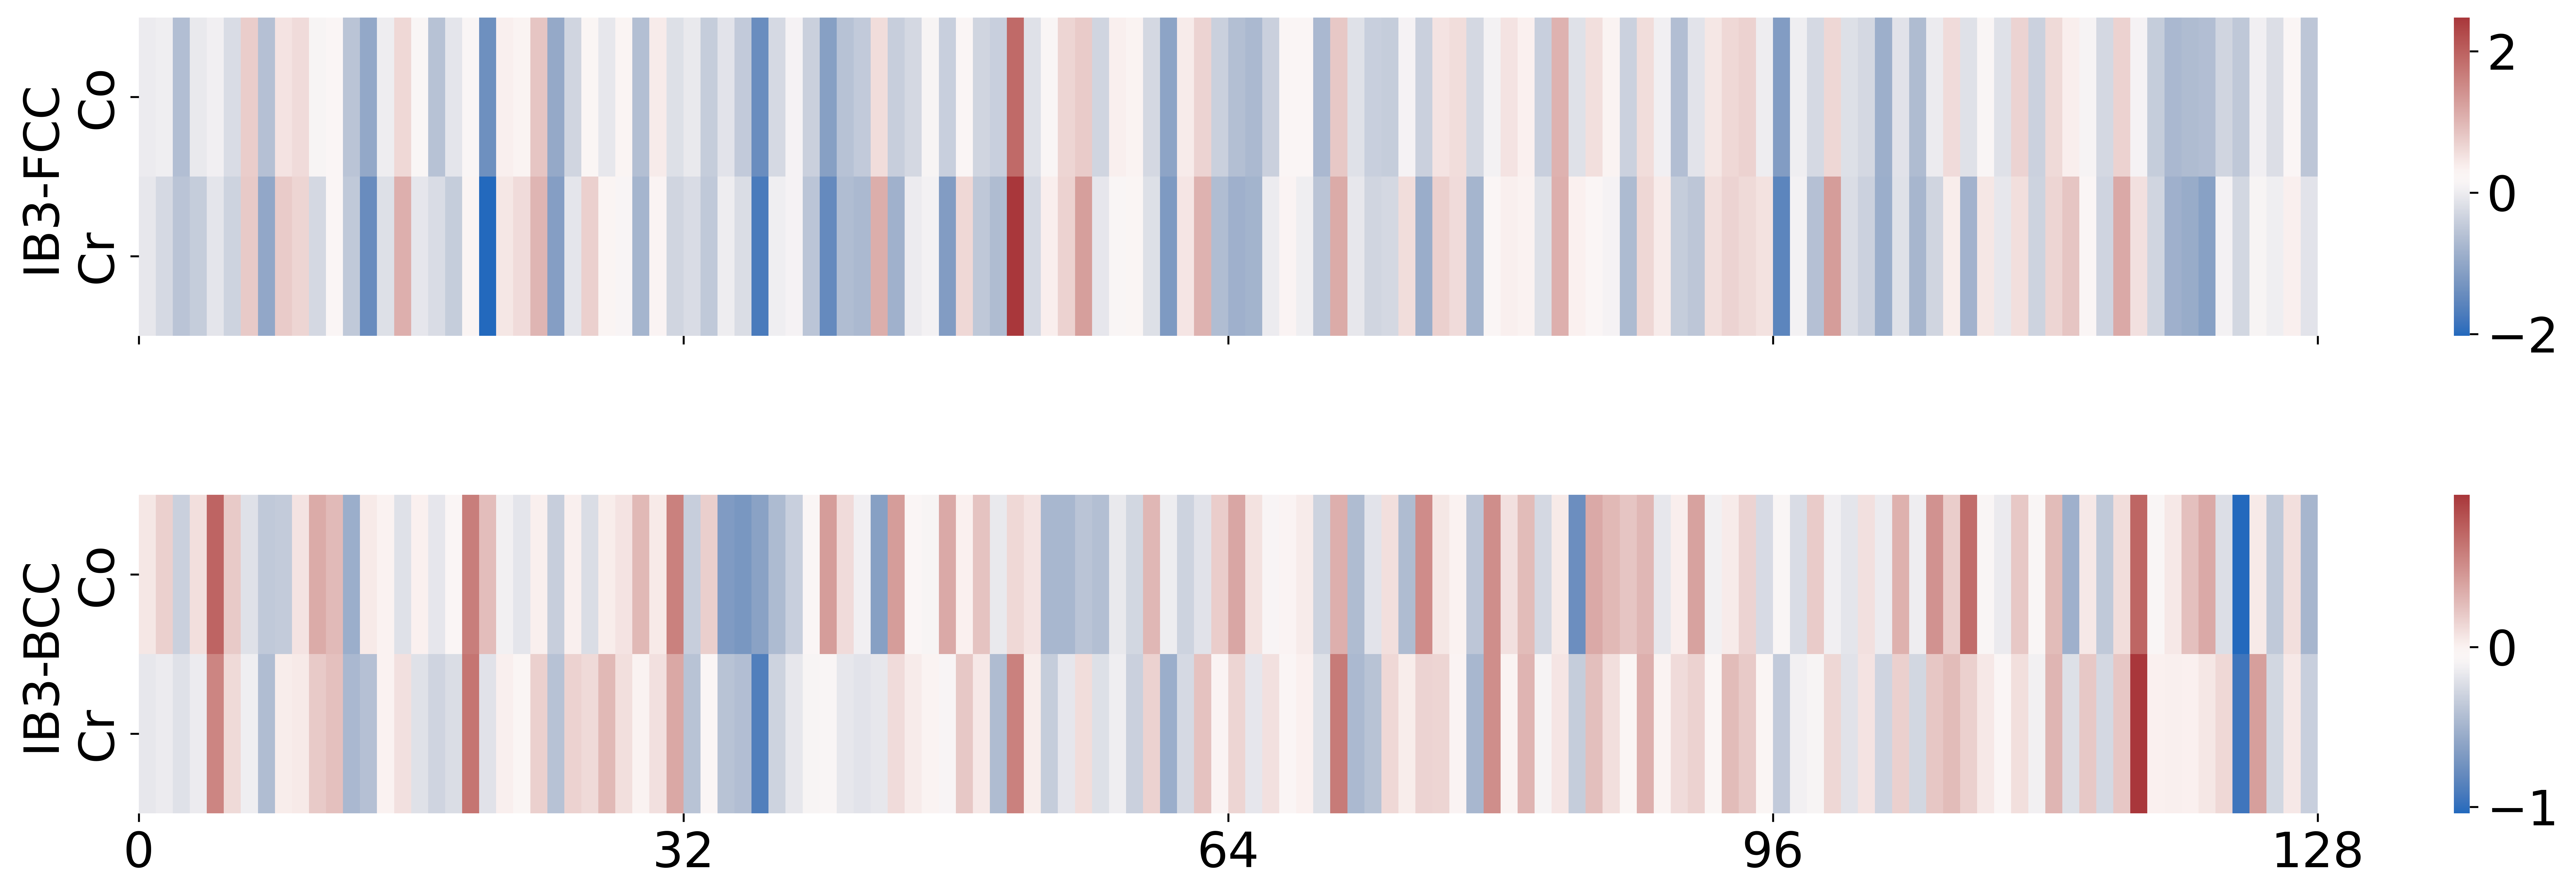

In [35]:
plot_act(activation2['interactions3'], activation['interactions3'])
plt.savefig('./fig/features/features_co3cr_comp.png', dpi=500,  bbox_inches='tight')

In [33]:
compare_distance(pos1=activation['interactions3'].cpu().numpy(),
                 pos2=activation2['interactions3'].cpu().numpy())
compare_distance(pos1=activation['interactions1'].cpu().numpy(),
                 pos2=activation2['interactions1'].cpu().numpy())

the F norm of the matrix 1 is 4.512844562530518 and matrix 2 is 9.764435768127441, 
while the difference of the norm is 9.7134428024292 (||delta_mat||/||matrix2||=0.9947776794433594). 
the F norm of the matrix 1 is 13.952964782714844 and matrix 2 is 12.719147682189941, 
while the difference of the norm is 9.039351463317871 (||delta_mat||/||matrix2||=0.7106884717941284). 


In [36]:
def plot_act_three(feature1, feature2, feature3, ylabel1=None,
                  ylabel2=None, ylabel3=None):
    # fig = plt.figure(figsize=(20, 8),dpi=300)
    label_size = 20
    cbar_label_size = 20
    fig, axes = plt.subplots(2, 1, sharex=True, figsize=(20,6 ), dpi=600)

    ax1 = plt.subplot(3,1,1)
    ax = sns.heatmap(feature1.cpu().numpy(), cmap='vlag', yticklabels=y_axis_labels, ax=ax1)
    cbar = ax.collections[0].colorbar
    # here set the labelsize by label_size
    cbar.ax.tick_params(labelsize=cbar_label_size)
    ax1.set_ylabel('IB1-BCC', fontsize=label_size)
    ax.tick_params(labelsize=cbar_label_size)
    ax.set_xticks(np.linspace(start=0, stop=128, num=5),
                   labels=None)
    
    
    ax1 = plt.subplot(3,1,2)
    ax = sns.heatmap(feature2.cpu().numpy(), cmap='vlag', yticklabels=y_axis_labels, ax=ax1)
    cbar = ax.collections[0].colorbar
    # here set the labelsize by label_size
    cbar.ax.tick_params(labelsize=cbar_label_size)
    ax1.set_ylabel('IB2-BCC', fontsize=label_size)
    ax.tick_params(labelsize=cbar_label_size)
    ax.set_xticks(np.linspace(start=0, stop=128, num=5),
                   labels=None)
    

    ax2 = plt.subplot(3,1,3)
    ax = sns.heatmap(feature3.cpu().numpy(), cmap='vlag', yticklabels=y_axis_labels, ax=ax2)
    ax2.set_ylabel('IB3-BCC', fontsize=label_size)
    cbar = ax.collections[0].colorbar
    # here set the labelsize by label_size
    cbar.ax.tick_params(labelsize=cbar_label_size)
    ax.tick_params(axis='x', labelsize=cbar_label_size,  labelrotation=360)
    ax.tick_params(axis='y', labelsize=cbar_label_size)
    ax.set_xticks(np.linspace(start=0, stop=128, num=5),
                   labels=[int(i) for i in np.linspace(start=0, stop=128, num=5)])


    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

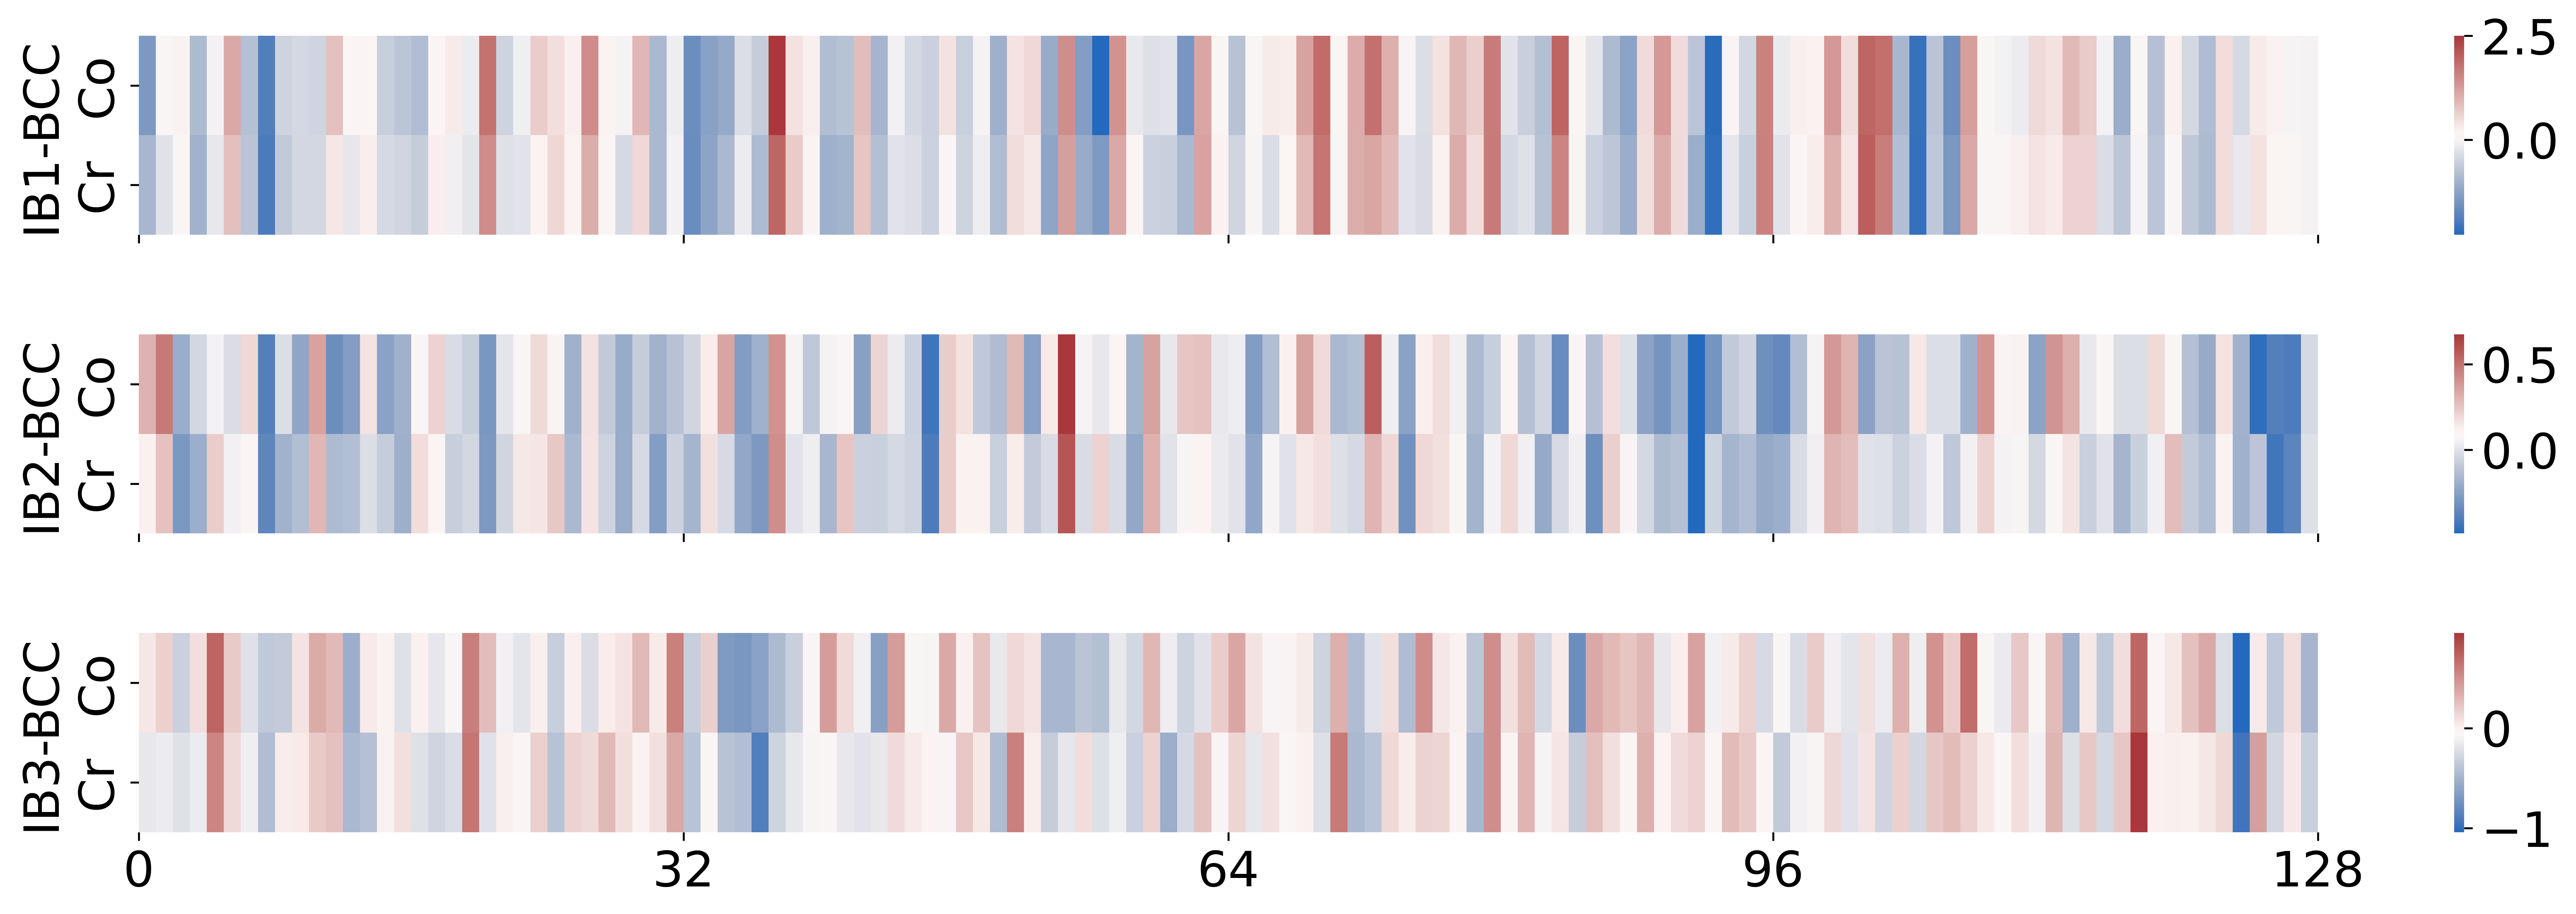

In [37]:
plot_act_three(activation['interactions1'], activation['interactions2'], activation['interactions3'])
plt.savefig('./fig/features/feature_3IB_Co3Cr_bcc_energy.png', dpi=500 , bbox_inches='tight')